# COMMUNITY DETECTION ON THE COUNTRY GRAPH

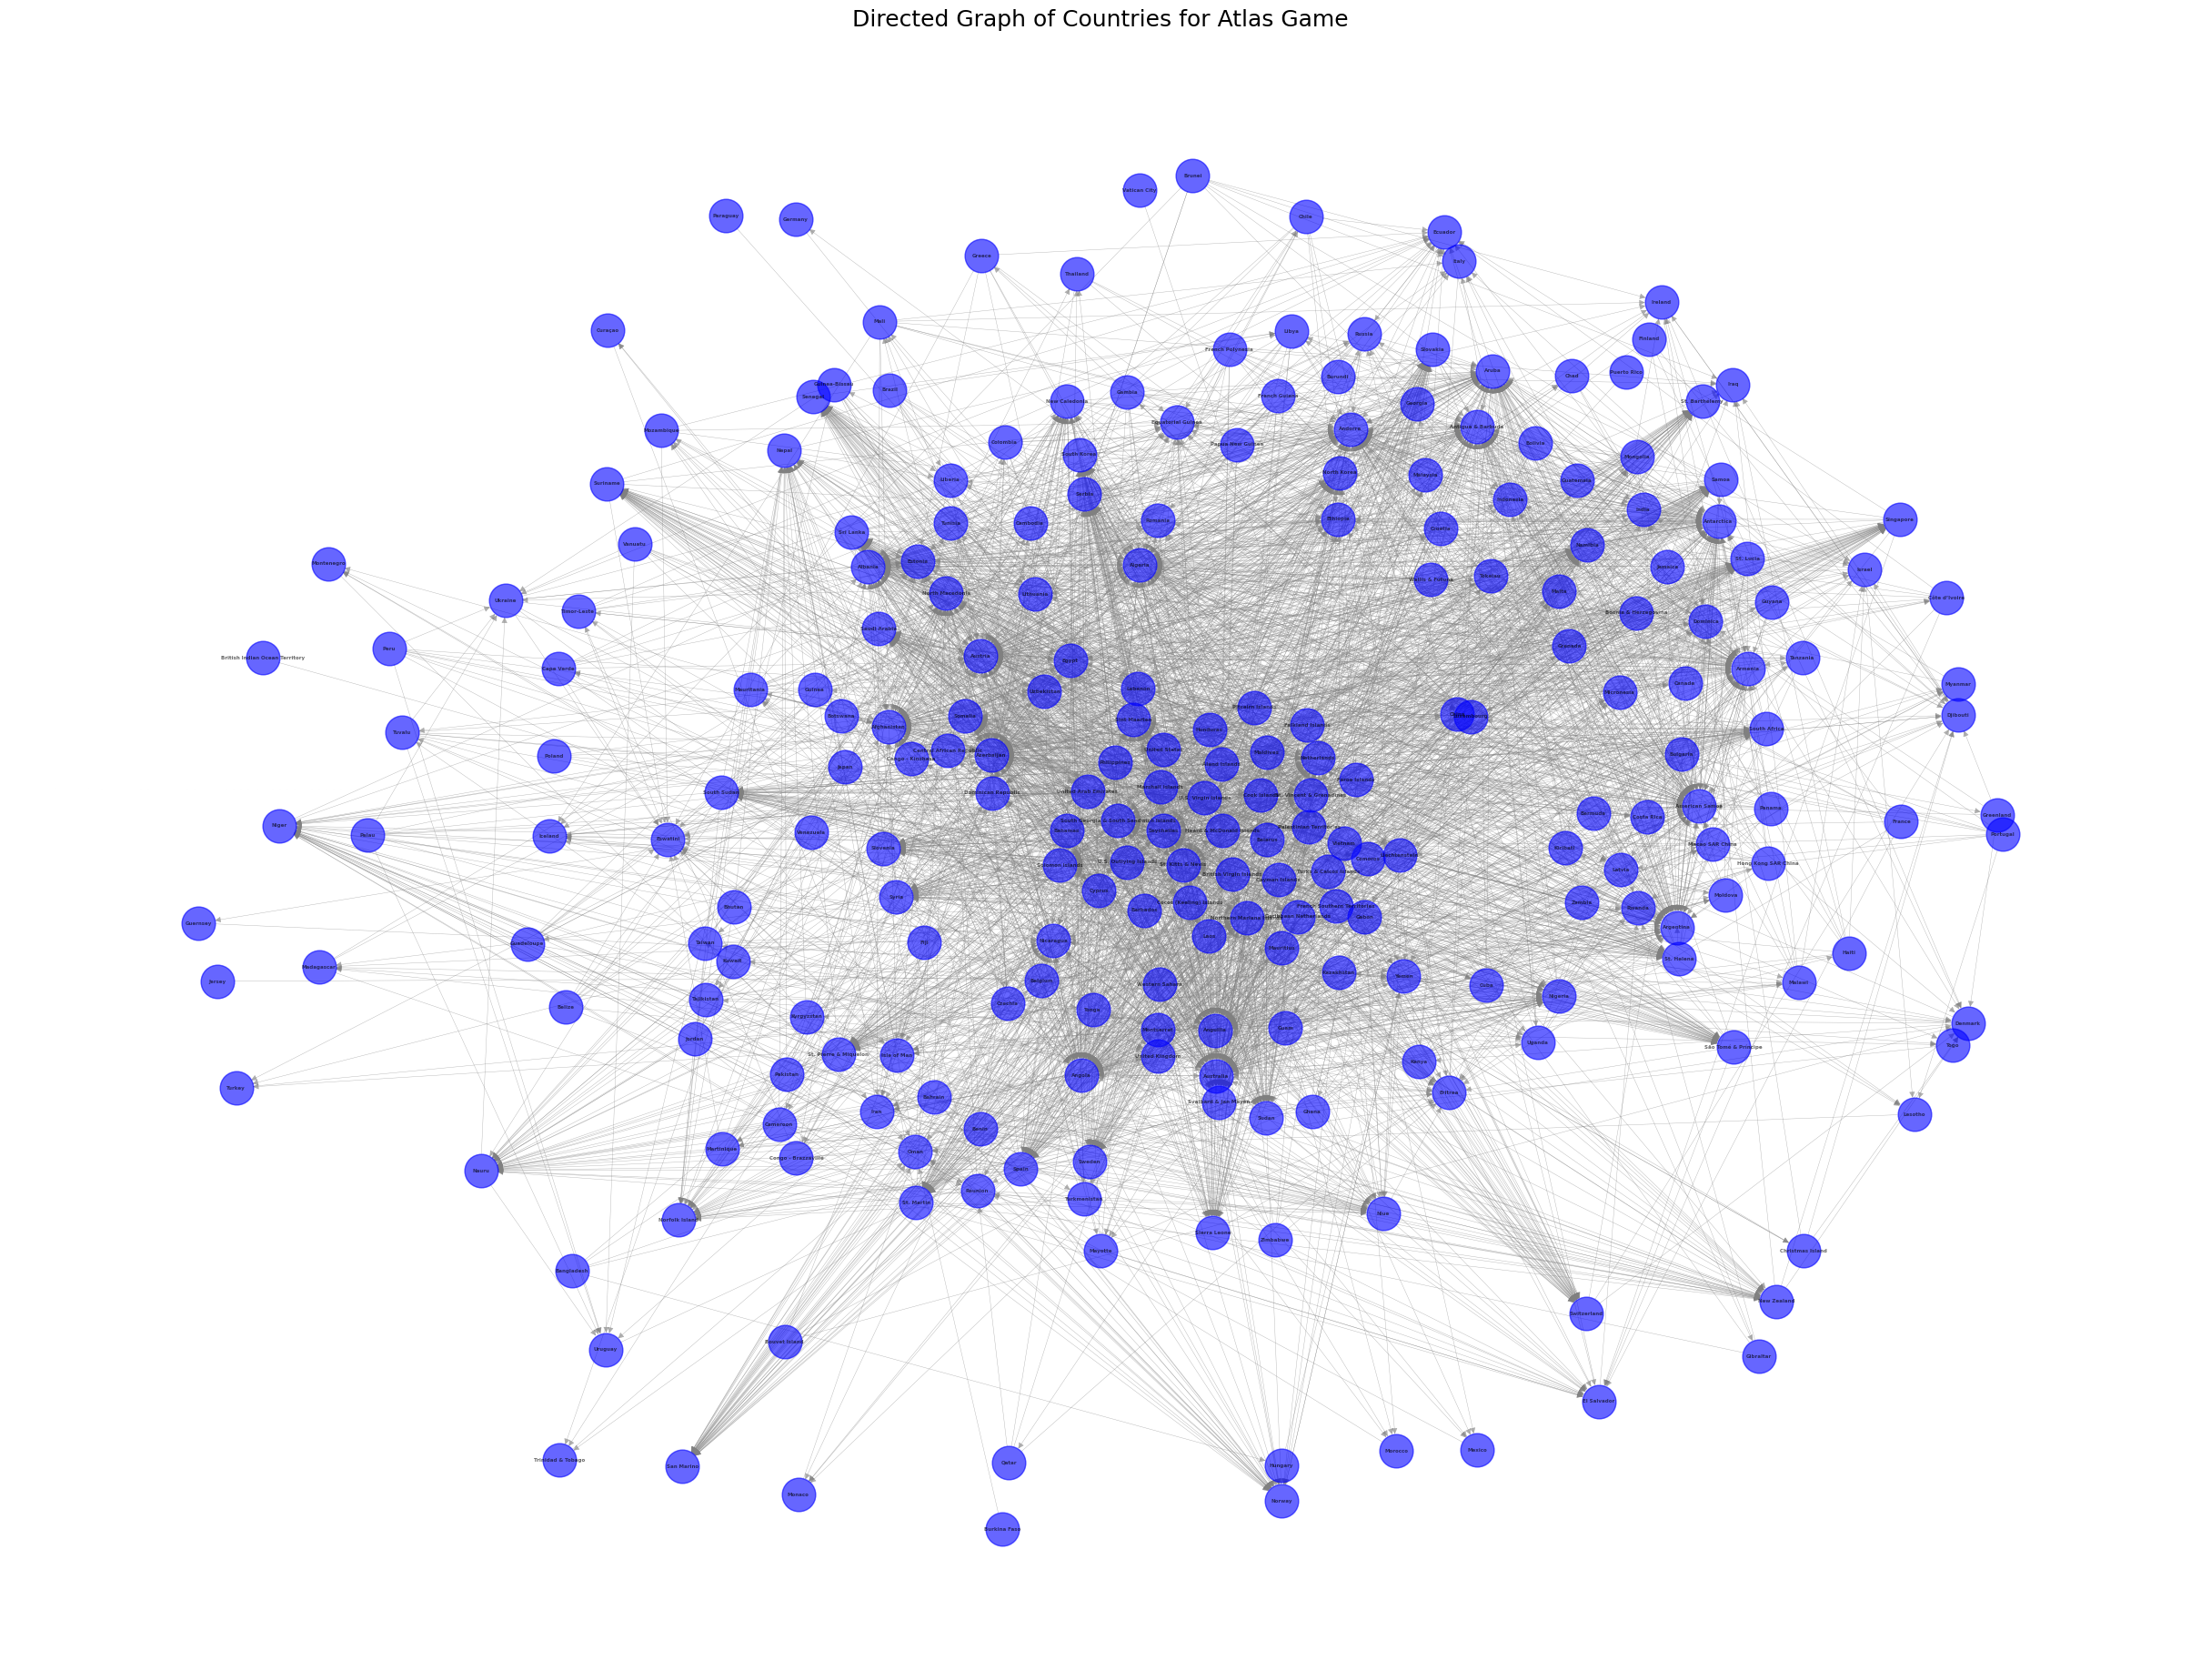

Number of nodes: 249
Number of edges: 3566


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.algorithms import community

file_path = "country.csv"  # Replace with your CSV path
df = pd.read_csv(file_path)

countries = df.set_index('value')['id'].to_dict()

G = nx.DiGraph()
for country, code in countries.items():
    last_letter = country[-1].lower()
    for other_country, other_code in countries.items():
        if other_country[0].lower() == last_letter and country != other_country:
            G.add_edge(country, other_country)

# Optional: visualize the directed graph
plt.figure(figsize=(24, 18))
pos = nx.fruchterman_reingold_layout(G, k=0.9, seed=42)
nx.draw(
    G, pos, with_labels=True, 
    node_size=700, node_color='blue', 
    edge_color='gray', font_size=4, 
    font_weight='bold', width=0.3, alpha=0.6
)
plt.title("Directed Graph of Countries for Atlas Game", fontsize=18)
plt.show()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")



🔹 Detected 5 communities using Louvain Algorithm:
Community 0: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua & Barbuda, Argentina...
Community 1: Namibia, Nauru, Nepal, Netherlands, New Caledonia, New Zealand, Nicaragua, Niger, Nigeria, Niue...
Community 2: Åland Islands, Samoa, San Marino, São Tomé & Príncipe, Saudi Arabia, Senegal, Serbia, Seychelles, Sierra Leone, Singapore...
Community 4: Bangladesh, Haiti, Hungary, Malawi, Mali, Bouvet Island, Denmark, Djibouti, Dominica, Dominican Republic...
Community 3: Belgium, Madagascar, Martinique, Mayotte, Mexico, Monaco, Montenegro, Montserrat, Morocco, Mozambique...

🔹 Modularity Score: 0.4589


/tmp/ipykernel_4701/2404206735.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  nx.draw_networkx_nodes(G_undirected, pos, nodelist=members, node_color=plt.cm.get_cmap("tab10")(comm_id / len(communities)))
/home/i-am-space/IIIT/ATLAS/.venv/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


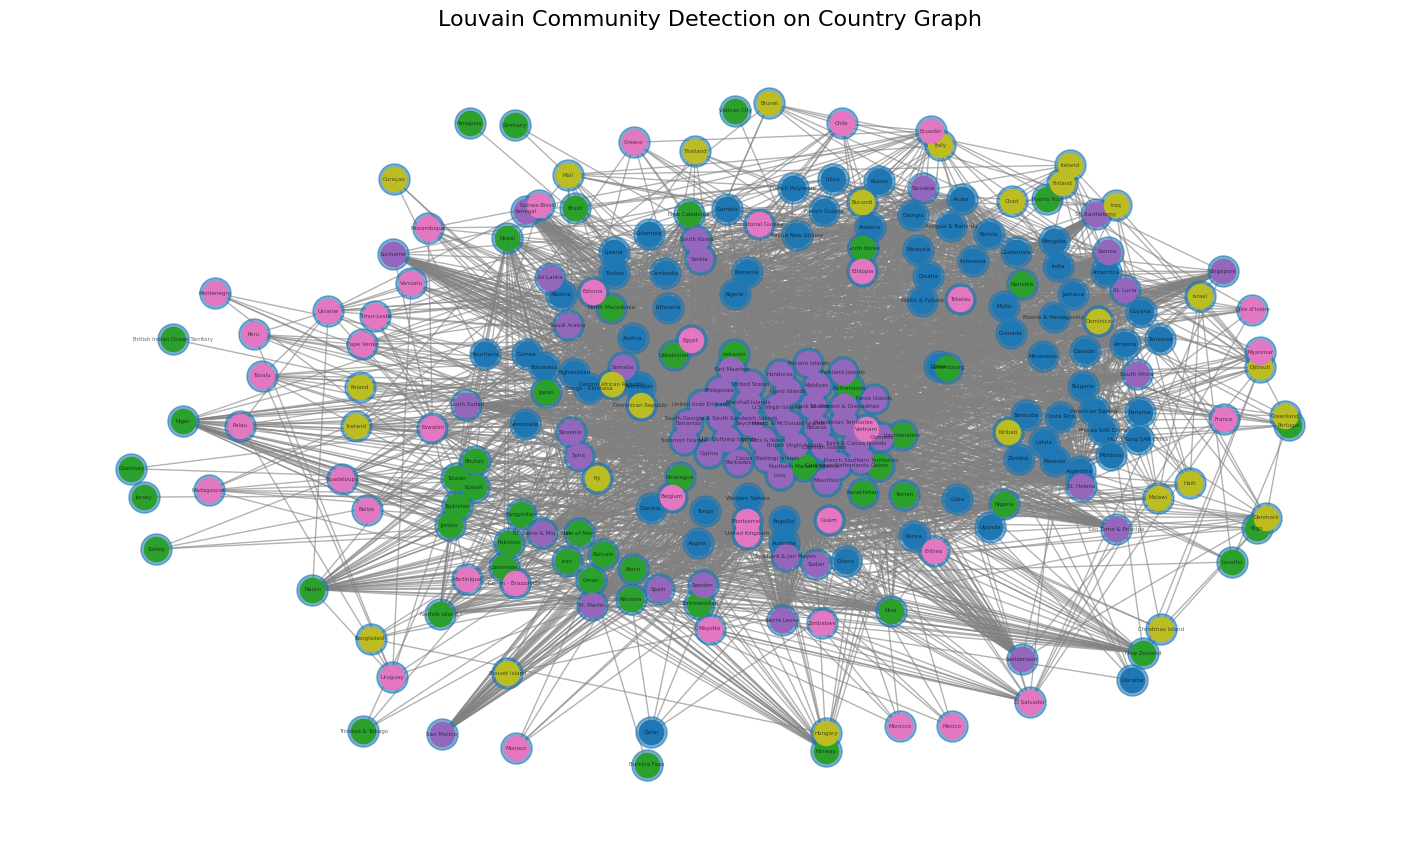

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain  # Louvain method for community detection

# Convert directed graph to undirected for Louvain
G_undirected = G.to_undirected()

# Apply Louvain community detection
partition = community_louvain.best_partition(G_undirected)

# Extract communities
communities = {}
for node, comm in partition.items():
    if comm not in communities:
        communities[comm] = []
    communities[comm].append(node)

# Print community summary
print(f"\n🔹 Detected {len(communities)} communities using Louvain Algorithm:")
for comm_id, members in communities.items():
    print(f"Community {comm_id}: {', '.join(members[:10])}...")  # Show only 10 members for brevity

# Compute modularity score
modularity_score = community_louvain.modularity(partition, G_undirected)
print(f"\n🔹 Modularity Score: {modularity_score:.4f}")

# Visualize the communities
plt.figure(figsize=(14, 8))
pos = nx.fruchterman_reingold_layout(G, k=0.9, seed=42)
nx.draw(G_undirected, pos, with_labels=True, node_size=500, edge_color='gray', font_size=4, alpha=0.6)

# Assign colors based on community
for comm_id, members in communities.items():
    nx.draw_networkx_nodes(G_undirected, pos, nodelist=members, node_color=plt.cm.get_cmap("tab10")(comm_id / len(communities)))

plt.title("Louvain Community Detection on Country Graph", fontsize=16)
plt.show()
